DATA EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('train.xlsx')

In [30]:
data['month_day'] = data['PRICES'].dt.strftime('%m-%d')
daily_avg = data.groupby(data['month_day']).mean()
daily_avg = daily_avg.drop(columns=['PRICES'])
daily_avg

,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,Hour 10,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
month_day,,,,,,,,,,,,,,,,,,,,,
01-01,48.273333,48.473333,44.376667,31.290000,23.310000,21.566667,15.686667,14.840000,15.336667,19.436667,...,34.316667,31.300000,30.406667,45.146667,55.326667,56.910000,58.586667,52.410000,56.583333,49.663333
01-02,37.960000,32.546667,31.186667,24.593333,22.740000,26.613333,30.083333,44.020000,47.970000,56.550000,...,57.820000,55.190000,56.303333,69.936667,76.256667,72.346667,68.093333,56.176667,56.416667,54.053333
01-03,49.570000,43.450000,43.083333,38.220000,33.160000,40.310000,45.036667,58.570000,63.903333,66.606667,...,60.726667,60.126667,66.783333,106.606667,107.386667,84.210000,71.910000,57.166667,62.270000,63.010000
01-04,47.666667,40.563333,40.816667,35.973333,31.710000,36.636667,40.813333,48.360000,54.513333,60.336667,...,55.000000,54.536667,57.963333,79.930000,114.320000,73.500000,64.973333,56.246667,53.020000,48.183333
01-05,46.196667,42.703333,36.950000,32.153333,20.796667,31.513333,34.153333,51.000000,57.116667,61.720000,...,62.100000,62.016667,61.913333,74.600000,82.493333,70.606667,59.216667,49.200000,48.866667,48.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,47.120000,35.023333,23.333333,18.293333,9.406667,10.720000,21.836667,25.576667,34.390000,45.676667,...,50.140000,44.360000,45.880000,56.976667,64.780000,64.010000,57.103333,43.416667,50.953333,46.083333
12-28,29.033333,24.583333,20.266667,19.313333,18.600000,26.056667,29.713333,34.836667,44.306667,49.650000,...,47.933333,45.326667,48.893333,62.460000,69.180000,64.590000,58.160000,46.290000,47.733333,47.666667
12-29,42.543333,42.630000,39.686667,31.090000,24.053333,31.096667,29.100000,42.306667,44.966667,49.670000,...,50.643333,44.013333,44.330000,59.883333,68.753333,65.313333,55.940000,45.420000,46.653333,45.216667


In [4]:
daily_avg['avg_price_per_day'] = daily_avg.filter(like='Hour').apply(lambda row: row.mean(), axis=1)
daily_avg = daily_avg.reset_index()
daily_avg[['month_day', 'avg_price_per_day']]

,month_day,avg_price_per_day
0,01-01,37.127917
1,01-02,51.492778
2,01-03,62.271389
3,01-04,55.835139
4,01-05,54.406389
...,...,...
361,12-27,41.905556
362,12-28,43.597361
363,12-29,47.021528
364,12-30,41.747917


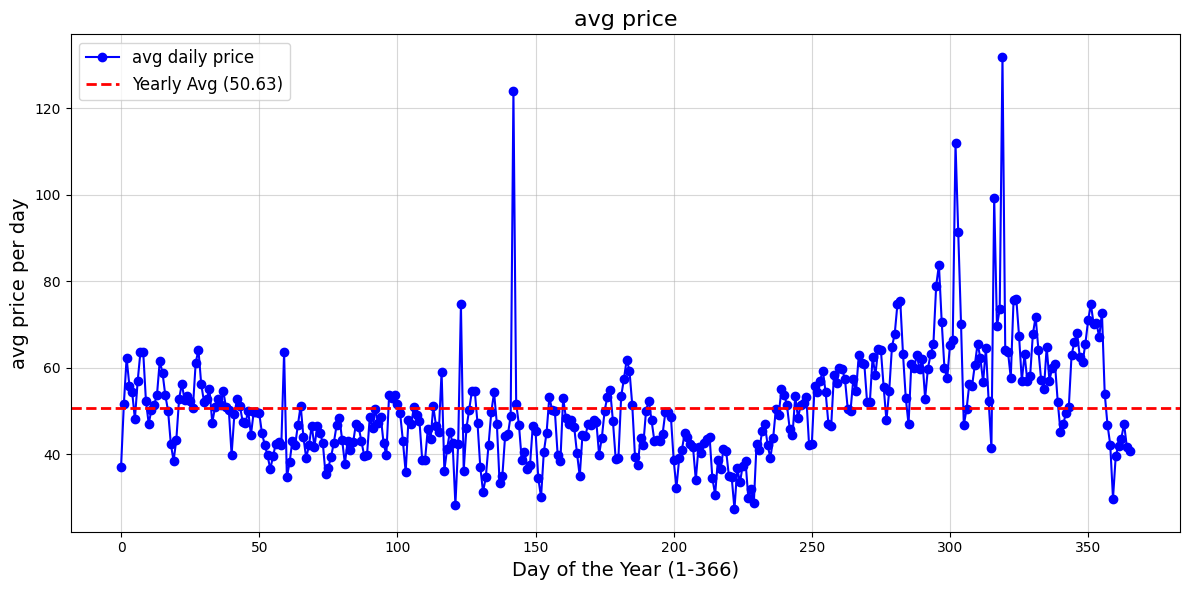

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['avg_price_per_day'], marker='o', linestyle='-', color='b', label='avg daily price')
plt.axhline(y=daily_avg['avg_price_per_day'].mean(), color='red', linestyle='--', linewidth=2, label=f'Yearly Avg ({daily_avg['avg_price_per_day'].mean():.2f})')
plt.title('avg price', fontsize=16)
plt.xlabel('Day of the Year (1-366)', fontsize=14)
plt.ylabel('avg price per day', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
daily_avg['avg_price_per_day'].mean()

50.626245066788094

In [8]:
daily_avg['total_daily_price'] = daily_avg.filter(like='Hour').apply(lambda row: row.sum(), axis=1)
daily_avg = daily_avg.reset_index()
daily_avg[['month_day', 'total_daily_price']]

,month_day,total_daily_price
0,01-01,891.070000
1,01-02,1235.826667
2,01-03,1494.513333
3,01-04,1340.043333
4,01-05,1305.753333
...,...,...
361,12-27,1005.733333
362,12-28,1046.336667
363,12-29,1128.516667
364,12-30,1001.950000


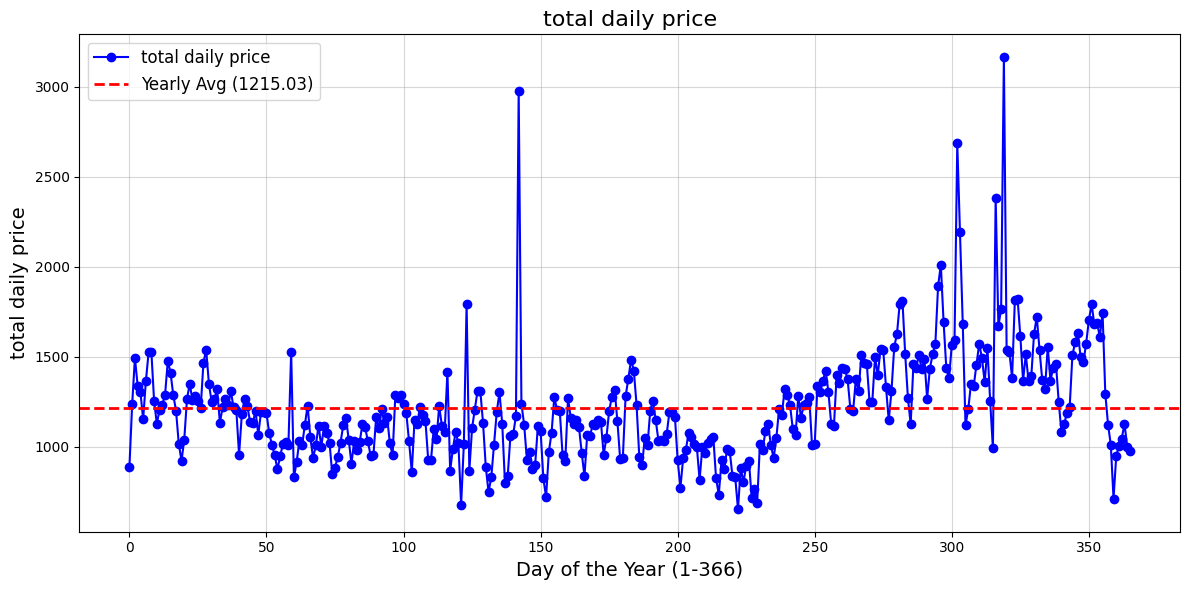

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['total_daily_price'], marker='o', linestyle='-', color='b', label='total daily price')
plt.axhline(y=daily_avg['total_daily_price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Yearly Avg ({daily_avg['total_daily_price'].mean():.2f})')
plt.title('total daily price', fontsize=16)
plt.xlabel('Day of the Year (1-366)', fontsize=14)
plt.ylabel('total daily price', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

avg and total graph looks identical, which means that there are no significant fluctuations in the price during the day (the daily price is just high regardles of the hour price e.g. hour1 price = 10, hour2 price = 10 000)

# Baseline 1

Take the average of each hour per calendar day and buy to fulfill the energy requirements.

In [32]:
# Define a function to highlight the lowest 12 values in a row
def highlight_lowest_12(row):
    # Get only "Hour" columns
    hour_cols = [col for col in row.index if col.startswith('Hour')]
    
    # Find the 12 lowest values
    lowest_indices = row[hour_cols].nsmallest(12).index
    
    # Create a style list
    style = ['background-color: yellow' if col in lowest_indices else '' for col in row.index]
    return style

In [36]:
data['month_day'] = data['PRICES'].dt.strftime('%m-%d')
daily_avg = data.groupby(data['month_day']).mean()
daily_avg = daily_avg.drop(columns=['PRICES'])
daily_avg

lowest_daily_prices = daily_avg.style.apply(highlight_lowest_12, axis=1)
# UNCOMMENT IF YOU WANT TO SEE WHEN WE ARE BUYING. THERE IS A CLEAR PATTERN
# lowest_daily_prices

In [6]:
daily_avg['daily_spending'] = daily_avg.filter(like='Hour').apply(lambda row: row.nsmallest(12).sum(), axis=1)
daily_avg = daily_avg.reset_index()
daily_avg[['month_day', 'daily_spending']]

,month_day,daily_spending
0,01-01,298.046667
1,01-02,463.133333
2,01-03,591.690000
3,01-04,532.793333
4,01-05,498.800000
...,...,...
361,12-27,357.913333
362,12-28,385.993333
363,12-29,461.033333
364,12-30,375.233333


In [7]:
# daily_avg[daily_avg['daily_spending'] > 600]

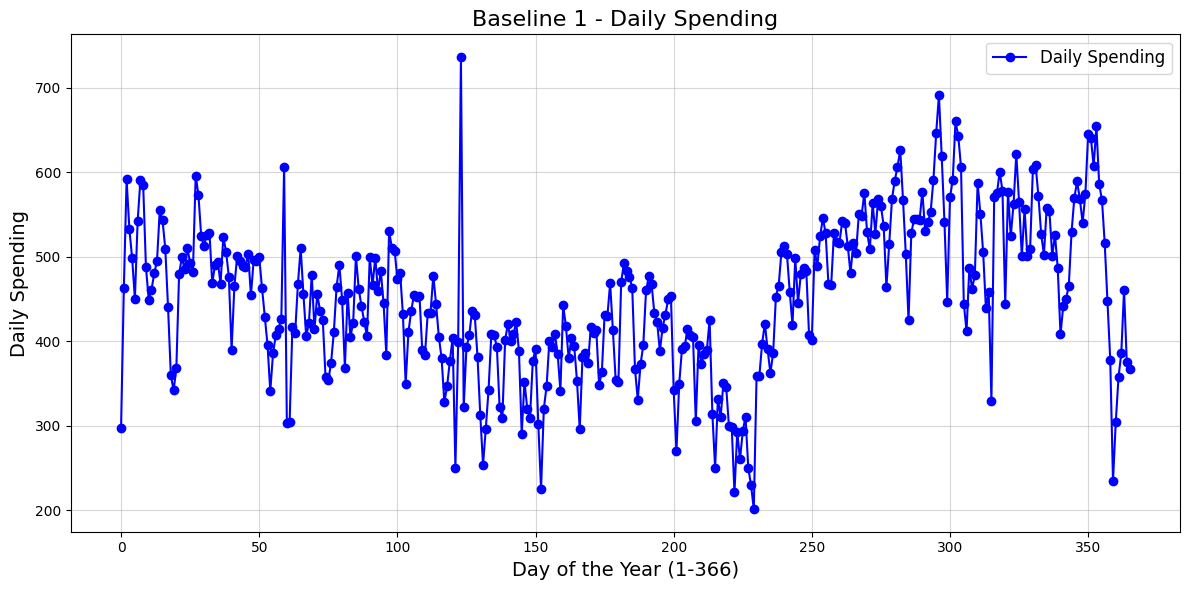

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['daily_spending'], marker='o', linestyle='-', color='b', label='Daily Spending')
plt.title('Baseline 1 - Daily Spending', fontsize=16)
plt.xlabel('Day of the Year (1-366)', fontsize=14)
plt.ylabel('Daily Spending', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [9]:
# TOTAL BASELINE 1 SPENDING
daily_avg['daily_spending'].sum()

165447.39666666664

# Baseline 2    

Similar to baseline 1, but let's take the advantage of buying extra energy. We can buy extra for the next day if the price is below avg and/or - treshold value and save some money for the expensive day. Advanced rollout method would be to keep buying extra 50MWh until a bad day comes where we use it all and buy only 70MWh.

In [12]:
data['month_day'] = data['PRICES'].dt.strftime('%m-%d')
daily_avg = data.groupby(data['month_day']).mean()
daily_avg = daily_avg.drop(columns=['PRICES'])
daily_avg

,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,Hour 10,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
month_day,,,,,,,,,,,,,,,,,,,,,
01-01,48.273333,48.473333,44.376667,31.290000,23.310000,21.566667,15.686667,14.840000,15.336667,19.436667,...,34.316667,31.300000,30.406667,45.146667,55.326667,56.910000,58.586667,52.410000,56.583333,49.663333
01-02,37.960000,32.546667,31.186667,24.593333,22.740000,26.613333,30.083333,44.020000,47.970000,56.550000,...,57.820000,55.190000,56.303333,69.936667,76.256667,72.346667,68.093333,56.176667,56.416667,54.053333
01-03,49.570000,43.450000,43.083333,38.220000,33.160000,40.310000,45.036667,58.570000,63.903333,66.606667,...,60.726667,60.126667,66.783333,106.606667,107.386667,84.210000,71.910000,57.166667,62.270000,63.010000
01-04,47.666667,40.563333,40.816667,35.973333,31.710000,36.636667,40.813333,48.360000,54.513333,60.336667,...,55.000000,54.536667,57.963333,79.930000,114.320000,73.500000,64.973333,56.246667,53.020000,48.183333
01-05,46.196667,42.703333,36.950000,32.153333,20.796667,31.513333,34.153333,51.000000,57.116667,61.720000,...,62.100000,62.016667,61.913333,74.600000,82.493333,70.606667,59.216667,49.200000,48.866667,48.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,47.120000,35.023333,23.333333,18.293333,9.406667,10.720000,21.836667,25.576667,34.390000,45.676667,...,50.140000,44.360000,45.880000,56.976667,64.780000,64.010000,57.103333,43.416667,50.953333,46.083333
12-28,29.033333,24.583333,20.266667,19.313333,18.600000,26.056667,29.713333,34.836667,44.306667,49.650000,...,47.933333,45.326667,48.893333,62.460000,69.180000,64.590000,58.160000,46.290000,47.733333,47.666667
12-29,42.543333,42.630000,39.686667,31.090000,24.053333,31.096667,29.100000,42.306667,44.966667,49.670000,...,50.643333,44.013333,44.330000,59.883333,68.753333,65.313333,55.940000,45.420000,46.653333,45.216667


In [16]:
hourly_columns = [col for col in daily_avg.columns if col.startswith('Hour')]
array = daily_avg[hourly_columns].to_numpy()
array[0]
np.argsort(array[0])

array([ 7,  8,  6,  9,  5,  4, 10, 16,  3, 15, 11, 14, 13, 12,  2, 17,  0,
        1, 23, 21, 18, 22, 19, 20], dtype=int64)

In [23]:
carryover = []
total_per_day = []
hours_when_bought = []
for day in range(len(array)):
    todays_best_indices = np.argsort(array[day])
    if carryover:
        current_best_prices = todays_best_indices[:12 - len(carryover)]
        potential_carryover = todays_best_indices[12 - len(carryover):17 - len(carryover)]
    else:
        current_best_prices = todays_best_indices[:12]
        potential_carryover = todays_best_indices[12:17]
    if day + 1 < array.shape[0]:
        carryover = []
        next_day_best_indices = np.argsort(array[day + 1])
        next_day_best_prices = array[day + 1][next_day_best_indices][:12]
        indices = []
        for x in potential_carryover:
            price = array[day][x]
            if np.any(price < next_day_best_prices):
                carryover.append(price)
                max_index = np.argmax(next_day_best_prices)
                next_day_best_prices = np.delete(next_day_best_prices, max_index)
                indices.append(x)
                
        total_per_day.append(np.sum(array[day][current_best_prices]) + sum(carryover))
        hours_when_bought.append(np.append(current_best_prices, indices))
    else:
        total_per_day.append(np.sum(array[day][current_best_prices]))
        hours_when_bought.append(current_best_prices)
    

In [25]:
hours_when_bought

[array([ 7,  8,  6,  9,  5,  4, 10, 16,  3, 15, 11, 14, 13, 12,  2, 17],
       dtype=int64),
 array([ 4,  3,  5,  6,  2,  1,  0,  7,  8, 23, 15, 21, 16], dtype=int64),
 array([4., 3., 5., 2., 1., 6., 0.]),
 array([ 4,  3,  5,  1,  6,  2,  0, 23,  7, 22,  8, 15, 14], dtype=int64),
 array([ 4.,  5.,  3.,  6.,  2.,  1.,  0., 23., 22., 21.,  7.]),
 array([ 6,  4,  5,  3,  7,  2,  1,  0, 21,  8, 15, 23, 16,  9, 14, 20],
       dtype=int64),
 array([ 5,  4,  3,  2,  1,  6,  0, 23,  7, 21, 22], dtype=int64),
 array([ 4,  3,  0,  2,  5,  1,  6, 23, 21, 22], dtype=int64),
 array([ 4.,  3.,  2.,  5.,  1.,  0., 23., 22., 21.,  6., 15.]),
 array([ 4.,  3.,  2.,  5.,  1.,  6.,  0., 23., 21., 22.,  7., 15.]),
 array([ 4,  3,  5,  2,  6,  1,  0, 23, 22, 21,  7, 15, 16, 14],
       dtype=int64),
 array([ 4,  3,  5,  2,  1,  0,  6, 23, 21, 22, 15], dtype=int64),
 array([ 4,  3,  5,  6,  2,  1,  0, 23,  7, 21, 15, 22, 16], dtype=int64),
 array([ 4,  3,  5,  2,  1,  0,  6, 23, 21, 15, 16, 22], dtype=int

In [27]:
sum(total_per_day)

163042.6233333333